In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#S (patient prepared to go home),
#A (patient sent to general hospital floor)

In [2]:
import io
%cd "C:\Users\KESIRAJU TEJASWINI\Documents\"

C:\Users\KESIRAJU TEJASWINI\Documents


In [3]:
df =pd.read_excel("MLdata.xlsx")

In [4]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL',
       'CORE-STBL.1', 'CORE-STBL.2', 'decision-ADM-DECS'],
      dtype='object')

In [56]:
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,CORE-STBL.1,CORE-STBL.2,decision-ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [5]:
X= df.drop(['decision-ADM-DECS'],axis=1)
y = df['decision-ADM-DECS']

In [6]:
X = pd.get_dummies(X, drop_first = True)

In [57]:
X.head()

,CORE-STBL.2,L-CORE_low,L-CORE_mid,L-SURF_low,L-SURF_mid,L-O2_good,L-BP_mid,SURF-STBL_unstable,CORE-STBL_unstable,CORE-STBL.1_stable,CORE-STBL.1_unstable
0,15,0,1,1,0,0,1,0,0,1,0
1,10,0,1,0,0,0,0,0,0,1,0
2,10,0,0,1,0,0,0,0,0,0,0
3,15,0,1,1,0,1,0,0,1,0,0
4,10,0,1,0,1,0,0,0,0,1,0


In [7]:
y = pd.get_dummies(y, drop_first = True)

In [58]:
y.head()

,S
0,0
1,1
2,0
3,0
4,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

In [12]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

In [14]:
# fit the model
logreg.fit(Xtrain, Ytrain)

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42, solver='liblinear')

In [15]:
#predict results

In [16]:
y_pred_test = logreg.predict(Xtest)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0], dtype=uint8)

In [17]:
# probability of getting output as 0 
logreg.predict_proba(Xtest)[:,0]

array([0.51415427, 0.73913945, 0.64640623, 0.58357639, 0.57303281,
       0.57753519, 0.78117402, 0.6603339 , 0.59003837, 0.50463874,
       0.59340787, 0.54413303, 0.74215938, 0.69090596, 0.83420861,
       0.70388378, 0.76129589, 0.73173123, 0.6305192 , 0.64912925,
       0.70388378, 0.59340787, 0.67844932, 0.71175808, 0.47652373,
       0.68187431, 0.58571033])

In [18]:
# probability of getting output as 1 - rain
logreg.predict_proba(Xtest)[:,1]

array([0.48584573, 0.26086055, 0.35359377, 0.41642361, 0.42696719,
       0.42246481, 0.21882598, 0.3396661 , 0.40996163, 0.49536126,
       0.40659213, 0.45586697, 0.25784062, 0.30909404, 0.16579139,
       0.29611622, 0.23870411, 0.26826877, 0.3694808 , 0.35087075,
       0.29611622, 0.40659213, 0.32155068, 0.28824192, 0.52347627,
       0.31812569, 0.41428967])

In [21]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Ytest, y_pred_test)))

Model accuracy score: 0.8519


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(Xtrain, Ytrain)))

print('Test set score: {:.4f}'.format(logreg.score(Xtest, Ytest)))

Training set score: 0.6984
Test set score: 0.8519


In [25]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=42)

# fit the model
logreg100.fit(Xtrain, Ytrain)

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=42, solver='liblinear')

In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(Xtrain, Ytrain)))

print('Test set score: {:.4f}'.format(logreg100.score(Xtest, Ytest)))

Training set score: 0.7143
Test set score: 0.6667


In [27]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(Xtrain, Ytrain)

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(Xtrain, Ytrain)))

print('Test set score: {:.4f}'.format(logreg001.score(Xtest, Ytest)))

Training set score: 0.6667
Test set score: 0.8889


In [29]:
#Compare model accuracy with null accuracy
#So, the model accuracy is 0.8519. But, we cannot say that our model is very good based on the above accuracy.
#We must compare it with the null accuracy.
#Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [30]:
# check class distribution in test set
Ytest.value_counts()

S
0    24
1     3
dtype: int64

In [31]:
# check null accuracy score
null_accuracy = (24/(24+3))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8889


In [32]:
#We can see that our model accuracy score is 0.8519 but null accuracy score is 0.8889.
#So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.
#Now, based on the above analysis we can conclude that our classification model accuracy is very good. 
#Our model is doing a very good job in terms of predicting the class labels.
#But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.
#We have another tool called Confusion matrix that comes to our rescue.

In [34]:
#A confusion matrix is a tool for summarizing the performance of a classification algorithm. 
#A confusion matrix will give us a clear picture of classification model performance 
#and the types of errors produced by the model.
#It gives us a summary of correct and incorrect predictions broken down by each category.
#The summary is represented in a tabular form.
#Four types of outcomes are possible while evaluating a classification model performance. 
#These four outcomes are described below:-
#True Positives (TP) – True Positives occur when we predict an observation 
#belongs to a certain class and the observation actually belongs to that class.
#True Negatives (TN) – True Negatives occur when we predict an observation does 
#not belong to a certain class and the observation actually does not belong to that class.
#False Positives (FP) – False Positives occur when we predict an observation belongs
#to a certain class but the observation actually does not belong to that class. 
#This type of error is called Type I error.
#False Negatives (FN) – False Negatives occur when we predict an observation does not belong 
#to a certain class but the observation actually belongs to that class. 
#This is a very serious error and it is called Type II error.
#These four outcomes are summarized in a confusion matrix given below.

In [35]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[23  1]
 [ 3  0]]

True Positives(TP) =  23

True Negatives(TN) =  0

False Positives(FP) =  1

False Negatives(FN) =  3


In [36]:
#The confusion matrix shows 23 + 0 = 23 correct predictions and 3+ 1 = 4 incorrect predictions.
#In this case, we have
#True Positives (Actual Positive:1 and Predict Positive:1) - 23
#True Negatives (Actual Negative:0 and Predict Negative:0) -0
#False Positives (Actual Negative:0 but Predict Positive:1) - 1 (Type I error)
#False Negatives (Actual Positive:1 but Predict Negative:0) - 3 (Type II error)

<AxesSubplot:>

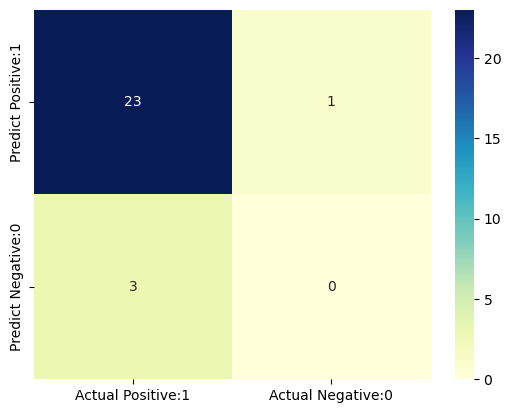

In [37]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
#CLASSIFICATION REPORT
#Classification report is another way to evaluate the classification model performance.
#It displays the precision, recall, f1 and support scores for the model. 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.00      0.00      0.00         3

    accuracy                           0.85        27
   macro avg       0.44      0.48      0.46        27
weighted avg       0.79      0.85      0.82        27



In [41]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8519


In [43]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1481


In [44]:
#Precision
#Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).
#So, Precision identifies the proportion of correctly predicted positive outcome.
#It is more concerned with the positive class than the negative class.
#Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [45]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9583


In [46]:
#Recall
#Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. 
#It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.
#Recall identifies the proportion of correctly predicted actual positives.
#Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [47]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8846


In [48]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

In [49]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8846


In [50]:
#False Positive Rate

In [51]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 1.0000


In [52]:
#Specificity

In [53]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0000


In [54]:
#f1-score
#f1-score is the weighted harmonic mean of precision and recall. 
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. 
#The weighted average of f1-score should be used to compare classifier models, not global accuracy.




#Support
#Support is the actual number of occurrences of the class in our dataset.

#Adjusting the threshold level (DOWN)

In [55]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = logreg.predict_proba(Xtest)[0:10]
y_pred_prob

array([[0.51415427, 0.48584573],
       [0.73913945, 0.26086055],
       [0.64640623, 0.35359377],
       [0.58357639, 0.41642361],
       [0.57303281, 0.42696719],
       [0.57753519, 0.42246481],
       [0.78117402, 0.21882598],
       [0.6603339 , 0.3396661 ],
       [0.59003837, 0.40996163],
       [0.50463874, 0.49536126]])

In [59]:
#Observations
#In each row, the numbers sum to 1.
#There are 2 columns which correspond to 2 classes - 0 and 1.
#Class 0 - predicted probability that A occurs
#Class 1 - predicted probability that S occurs
#Importance of predicted probabilities
#We can rank the observations by probability of S or A.
#predict_proba process
#Predicts the probabilities
#Choose the class with the highest probability
#Classification threshold level
#There is a classification threshold level of 0.5.
#Class 1 - probability of S is predicted if probability > 0.5.
#Class 0 - probability of A is predicted if probability < 0.5.

In [60]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - A (0)', 'Prob of - S (1)'])
y_pred_prob_df

,Prob of - A (0),Prob of - S (1)
0,0.514154,0.485846
1,0.739139,0.260861
2,0.646406,0.353594
3,0.583576,0.416424
4,0.573033,0.426967
5,0.577535,0.422465
6,0.781174,0.218826
7,0.660334,0.339666
8,0.590038,0.409962
9,0.504639,0.495361


In [61]:
# print the first 10 predicted probabilities for class S - Prepared to go home 
logreg.predict_proba(Xtest)[0:10, 1]

array([0.48584573, 0.26086055, 0.35359377, 0.41642361, 0.42696719,
       0.42246481, 0.21882598, 0.3396661 , 0.40996163, 0.49536126])

In [62]:
# store the predicted probabilities for class 1 - S

y_pred1 = logreg.predict_proba(Xtest)[:, 1]

Text(0, 0.5, 'Frequency')

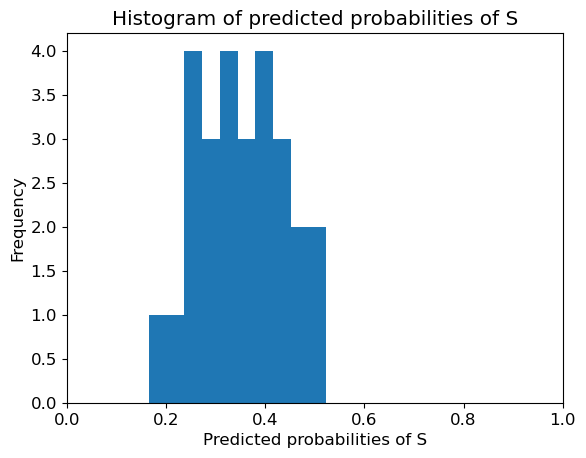

In [64]:
#plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of S')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of S')
plt.ylabel('Frequency')

In [65]:
#Observations
#We can see that the above histogram is highly positive skewed.
# there are more observations with probability between 0.2 and 0.5.
#There are no number of observations with probability > 0.5.
#So, these small number of observations predict that paitent will be in S.